# Exploratory Data Analysis and Linear Regression on Loan Applications at a bank

## 1. Loading a dataset from a CSV file.

In [1]:
#import the required libraries for data analysis in Python
import numpy as np #for efficient numerical operations
import pandas as pd #for manipulating and visualising data
from scipy import stats #for statistics

#read the csv file containing the details of the loan applicants
df = pd.read_csv("loanapp.csv")

In [2]:
#count and print the number of enteries in the dataset
print("The total number of enteries in the dataset is", len(df))

The total number of enteries in the dataset is 1988


## 2. Displaying descriptive statistics about the dataset.

In [3]:
#descriptive statistics on the dataset
df.describe()

,occupancy,loan_amount,applicant_income,num_units,num_dependants,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,property_type
count,1988.000000,1988.000000,1988.000000,1984.000000,1985.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000
mean,1.031690,143.272636,84.684105,1.122480,0.771285,5195.220825,196.304088,4620.333873,1.708249,2.110161,1.861167
std,0.191678,80.531470,87.079777,0.437315,1.104464,5270.360946,128.136030,67142.936043,0.555335,1.663256,0.535448
min,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,25.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,100.000000,48.000000,1.000000,0.000000,2875.750000,129.000000,20.000000,1.000000,1.000000,2.000000
50%,1.000000,126.000000,64.000000,1.000000,0.000000,3812.500000,163.000000,38.000000,2.000000,1.000000,2.000000
75%,1.000000,165.000000,88.000000,1.000000,1.000000,5594.500000,225.000000,83.000000,2.000000,2.000000,2.000000
max,3.000000,980.000000,972.000000,4.000000,8.000000,81000.000000,1535.000000,1000000.000000,4.000000,6.000000,3.000000


The table above describes the descriptive statistics on the numerical variables of the dataset, namely, number of values(count), mean, standard deviation, minimum and maximum values in the columns.

## 3. Checking if any records in the data have any missing values.

By analysing the count values from step 2, it can be identified that there are some missing values in the columns. Hence, the dataset needs to be checked for all missing values and is cleaned for better and accurate analysis. This is an important step that needs to be carried out before conducting any Explorartory Data Analysis.

In [4]:
#check if the dataset contains null values
#the function below counts the number of missing values in each column
df.isnull().sum()

married                     3
race                        0
loan_decision               0
occupancy                   0
loan_amount                 0
applicant_income            0
num_units                   4
num_dependants              3
self_employed               0
monthly_income              0
purchase_price              0
liquid_assets               0
mortage_payment_history     0
consumer_credit_history     0
filed_bankruptcy            0
property_type               0
gender                     14
dtype: int64

In the 1988 enteries, the number of missing values in each column is displayed above. Following on, the enteries with missing values are deleted from the dataset to carry out clean and accurate data analysis.

In [5]:
#to delete all the missing values
df.dropna(inplace=True, axis="rows")

In [6]:
#to check if there are still any missing values in the dataset
df.isnull().sum()

married                    0
race                       0
loan_decision              0
occupancy                  0
loan_amount                0
applicant_income           0
num_units                  0
num_dependants             0
self_employed              0
monthly_income             0
purchase_price             0
liquid_assets              0
mortage_payment_history    0
consumer_credit_history    0
filed_bankruptcy           0
property_type              0
gender                     0
dtype: int64

As seen above, there are no more missing values in the dataset.

In [7]:
#new number of enteries in the dataset
print("No. of enteries in the dataset after deleting the missing values are", len(df))

No. of enteries in the dataset after deleting the missing values are 1969


## 4. Displaying the distribution of (some of) numerical variables as histograms.

Text(0, 0.5, 'No. of Applicants')

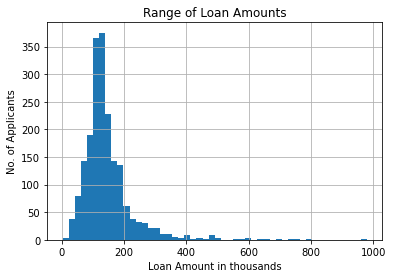

In [8]:
#the range of loan amounts is displayed as an histogram
loanamt = df["loan_amount"].hist(bins=50)
#title of the histogram
loanamt.set_title("Range of Loan Amounts")
#x-axis title
loanamt.set_xlabel("Loan Amount in thousands")
#y-axis title
loanamt.set_ylabel("No. of Applicants")

The above graph describes the range of loan amounts that are applied by the applicants.

It is seen that majority of the applicants have applied for a loan amount between £150-200,000.

Text(0, 0.5, 'No. of Applicants')

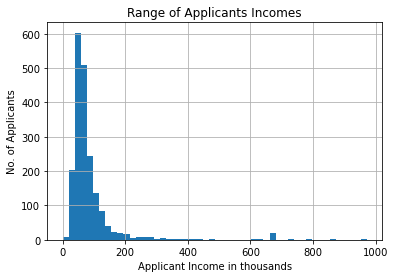

In [9]:
#the range of applicants incomes are2 displayed as an histogram
appinm = df["applicant_income"].hist(bins=50)
#title of the histogram
appinm.set_title("Range of Applicants Incomes")
#x-axis title
appinm.set_xlabel("Applicant Income in thousands")
#y-axis title
appinm.set_ylabel("No. of Applicants")

The above graph describes the range of income the applicants earn as an histogram.

The vast majority of the applicants have an income between £20-100,000.

## 5. Displaying unique values of a categorical variable.

In [10]:
#to display unique values of the categorical variable - race
print("The different races that are in the dataset are", df.race.unique())

The different races that are in the dataset are ['white' 'black' 'hispan']


## 6. Building a contingency table of two potentially related categorical variablesand conducting a statistical test of the independence between the variables. Provide verbal comments on the output.

In [11]:
#contingency table is created between race and their loan decisions
ct = pd.crosstab(df["race"], df["loan_decision"])
#display the contingency table
ct

loan_decision,approve,reject
race,,
black,131,64
hispan,82,26
white,1514,152


p-value: 1.1422552252120337e-23


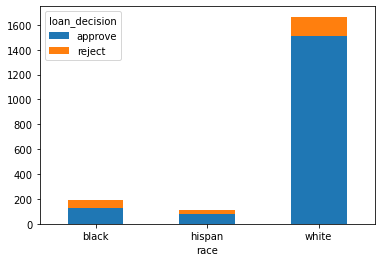

In [12]:
#the contingency table is plotted in a bar graph for visual understanding
ct.plot(kind="bar", stacked=True, rot=0)

#the chi-square test is conducted to check the independence between the variables
chi2, p_val, dof, expected = stats.chi2_contingency(ct)

#print the p-value
print(f"p-value: {p_val}")

The bar graph shows the distribution of number of loans accepted and rejected 
as per the applicant's race. 

For the chi-square test,

Null Hypothesis - There is no dependence between race and loan decision.

Alternate Hypothesis - There is dependence between race and loan decision.

Since, the p-value is less than the significane level (0.05), the null hypothesis 
is rejected.
i.e., evidence of strong dependence between race and loan decisions is found. 

## 7. Retrieving a subset of the data based on two or more criteria and present descriptive statistics on the subset.

In [13]:
#subset for applicant income for accept and reject.
#loan amount
#find their means
#find their sum

subset = df[["loan_amount", "applicant_income"]]
subset

,loan_amount,applicant_income
0,128,74
1,128,84
2,66,36
3,120,59
4,111,63
...,...,...
1983,158,96
1984,35,169
1985,225,49
1986,98,110


In [14]:
#display descriptive statistics of the subset
subset.describe()

,loan_amount,applicant_income
count,1969.000000,1969.000000
mean,143.505333,84.908075
std,80.802291,87.439115
min,2.000000,0.000000
25%,100.000000,48.000000
50%,126.000000,64.000000
75%,165.000000,88.000000
max,980.000000,972.000000


The above table displays the descriptive statics on the applicants based on their loan amount applied for and the applicant's income of the property that they have applied the loan for are displayed in thousands. 

The average of loan amount and applicant income are £143,505 and £84,908£, respectively, with a standard deviation of 80,000, 87,439, respectively. Finally, it is seen that the maximum amount of loan applied for among the applicants is £980,000.

## 8. Conducting a statistical test of the significance of the difference between the means of two subsets of the data.

In [15]:
#count the number of applications that are aprroved and rejected
print("The no. of applications approved and rejected are displayed below: ")
df["loan_decision"].value_counts()

The no. of applications approved and rejected are displayed below: 


approve    1727
reject      242
Name: loan_decision, dtype: int64

In [16]:
#calculate the mean monthly income of applicants whose loan got approved
app = df[df["loan_decision"] == "approve"]["monthly_income"]
mean1 = app.mean()
print("The mean monthly income of applicants whose loan got approved", mean1)

The mean monthly income of applicants whose loan got approved 5256.380428488709


In [17]:
#calculate the mean monthly income of applicants whose loan got rejected
rej = df[df["loan_decision"] == "reject"]["monthly_income"]
mean2 = rej.mean()
print("The mean monthly income of applicants whose loan got rejected", mean2)

The mean monthly income of applicants whose loan got rejected 4837.01652892562


An indepenent two sample t-test is conducted to test the significance of difference between the means of monthly income of applicants whose applications got approved and rejected.

The formulated hypothesis is:

Null hypothesis: the difference between the mean is assumed to be zero

Alternate hypothesis: there is a significant difference between the two means

A significance level of 0.05 is chosen.

In [18]:
#conduct a independent two sample t-test
t_val, p_val = stats.ttest_ind(app, rej)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 1.1548741531963007, p-value: 0.24828224204569163


The p_value from the t-test is greater than 0.05. Therefore, the null hypothesis is accepted which indicates that there is no difference between the mean monthly income of applicants whose applications got approved and rejected. 

## 9. Creating pivot tables.

In [19]:
ptable = df.groupby("gender").sum()
ptable

,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type
gender,,,,,,,,,,,,,
female,376,44344,26041,421.0,142.0,32,1600963,60367.030,39029.414,652,799,25,621
male,1656,238218,141143,1790.0,1375.0,225,8647364,327030.897,9145154.576,2707,3356,110,3046


## 10. Implementing a linear regression model and interpreting its output.

In [20]:
#import the required library for conducting linear regression
import statsmodels.api as sm

A linear regression model is implemented to predict how much loan amount is applied for based on the applicant's income, monthly income and the purchase price of the property.

The dependent variable y is loan_amount

The independent variables are  monthly_income, applicant_income and purchase price

<AxesSubplot:xlabel='monthly_income', ylabel='loan_amount'>

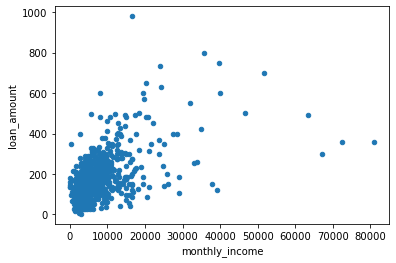

In [21]:
#plot monthly income and loan amount to describe their relationship
df.plot.scatter(x="monthly_income", y="loan_amount")

<AxesSubplot:xlabel='applicant_income', ylabel='loan_amount'>

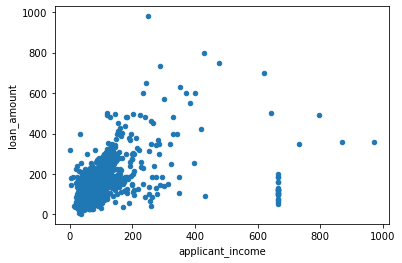

In [22]:
#plot applicant income and loan amount to describe their relationship
df.plot.scatter(x="applicant_income", y="loan_amount")

<AxesSubplot:xlabel='purchase_price', ylabel='loan_amount'>

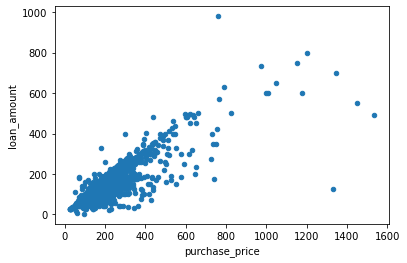

In [23]:
#plot purchase price and loan amount to describe their relationship
df.plot.scatter(x="purchase_price", y="loan_amount")

From the scatter plots above between monthly_income,purchase_price, applicant_income vs loan_amount, it can be seen that there is a positive linear relationship between the variables.

In [24]:
#run multiple linear regression
#the line of best fit in this linear regression model is found using the OLS model
model = sm.OLS.from_formula(
        "loan_amount ~ monthly_income + applicant_income + purchase_price", data = df).fit()

In [25]:
#produce summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1546.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:44:40   Log-Likelihood:                -10248.
No. Observations:                1969   AIC:                         2.050e+04
Df Residuals:                    1965   BIC:                         2.053e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           39.0811      1.848     21.153      0.000      35.458      42.704
monthly_income       0.0010      0.000      3.664      0.000       0.000       0.001
applicant_income     0.0455      0.014      3.265      0.001       0.018       0.073
purchase_price       0.4855      0.010     48.455      0.000       0.466       0.505
==============================================================================
Omnibus:                      763.117   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80164.594
Skew:                          -0.834   Prob(JB):                         0.00
Kurtosis:                      34.214   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(1) **Coefficients on the variables**. The estimated coefficients are specified in the second table. Our model is thus described by the line: 

loanamount = 39.0811 + 0.0010*monthlyincome + 0.0455*applicantincome + 0.4855*purchaseprice +e.

Considering the signs on the coefficients we can state that the loan amount applied for is positively affected by all the independent variables (greater the value of the variables, greater the amount of loan applied for).

(2) **Significance of the variables**. The p-values on all the coefficients indicate that the variables are significant, i.e., the factors do have a significant effect on the loan amount (p-values < 0.05).

(3) **Quality of the model**. The $R^2$ and the adjusted $R^2$ values are at 0.702 which shows a great fit compared to all other models. Only the best model is shown in the output. 

## Checking the assumptions of normality and zero mean of residuals

The standardized residuals and their histogram are plotted to confirm that the assumptions of normality of the distribution of residuals and of the zero mean of residuals are valid with this model.

In [26]:
#import bokehJS for plotting and showing figures
from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure
from bokeh.io import show

Loading BokehJS ...

In [27]:
fig = figure(height=400, width=400)

# the x axis is the fitted values
# the y axis is the standardized residuals
st_resids = model.get_influence().resid_studentized_internal
fig.circle(model.fittedvalues, st_resids)

show(fig)

In [28]:
# create a histogram with 10 bins
hist, edges = np.histogram(st_resids, bins=10)
fig = figure(height=400, width=400)
fig.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:])
show(fig)

The scatterplot and the histogram suggests that the residuals are equally distributed around 0 and are normally distributed. The results of the Jarque-Bera test on the residuals (the third table of the summary) also indicate that the errors are distributed normally: the p-value equals 0.00, therefore we cannot reject the null hypothesis of normal distribution.

Therefore, the provided linear regression model holds and is valid to make predictions on the amount of loan that will be applied by the applicant based on the applicants income, monthly income and the purchase price.